# _COMP41680 Assignment 1: Data Collection & Preparation_
# _By Akash Nanndi(17200206)_

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sys
import json
import matplotlib.pyplot as plt
import urllib.request
import csv
%matplotlib inline

## _<font color=blue>Task 1: Choose API as data source</font>_

## _Description_
### _A single open source API was chosen for this project from https://www.data.gov_
### _<p style='text-align: justify;'>The API is about leading causes of death by sex and ethnicity in New York City in since 2007. Cause of death is derived from the NYC death certificate which is issued for every death that occurs in New York City. This dataset contains the cause for death, the race of people , the death rate and the year of deaths with respect to the type of disease and race. Ahead we will clean the data and perform some analysis and insights with the help of visualizations.</p> _

### <font color=green>Source</font>: _Bureau of Vital Statistics and  New York City Department of Health and Mental Hygiene_

## _<font color=blue>Task 2: Collect data from your API</font>_

In [2]:
# Store the link in the url variable and pass it to to the urllib request which retrieves the api in raw format.
# Use json.loads() to store the page in json readable format for further processing.
url = "https://data.cityofnewyork.us/api/views/jb7j-dtam/rows.json?accessType=DOWNLOAD" 
response = urllib.request.urlopen(url)
raw_json = response.read().decode("utf-8")
data = json.loads(raw_json)

## _<font color=blue>Task 3: Parse data and store it in CSV format</font>_

In [3]:
# Use file functions to read in each row into the csv file 'export_dataframe'. Notice we are using writerows which stores in all rows at once.
with open('export_dataframe.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(data['data'])

csvFile.close()

## _<font color=blue>Task 4: Load and represent data in proper format and apply preprocessing steps</font>_

In [4]:
# Create an empty Dataframe and append each row into the Dataframe for every time the loop runs.
df=pd.DataFrame()
with open('export_dataframe.csv', 'r') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        df=df.append(pd.DataFrame([row]))

csvFile.close()

In [5]:
df.head(5) #Notice that we get all sorts of columns which we dont require for our analysis. Hence we will clean up the dataframe which is done in the subsequent steps

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,3283,8FB75064-152E-478B-A3EA-A61014B81858,3283,1544474204,399231,1544474204,399231,,2012,All Other Causes,M,Not Stated/Unknown,78,.,.
0,3358,C8C45F9B-7957-4668-80BF-10AEB1CFAC63,3358,1544474204,399231,1544474204,399231,,2014,Diabetes Mellitus (E10-E14),M,Not Stated/Unknown,8,.,.
0,3284,B865B8F1-13C5-492E-AFBF-CFA406162B36,3284,1544474204,399231,1544474204,399231,,2008,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Black Non-Hispanic,2077,244.6,330.2
0,3285,92815C1E-F25B-44DA-98BE-938FB6EA5D92,3285,1544474204,399231,1544474204,399231,,2010,All Other Causes,M,Black Non-Hispanic,1230,144.5,166.2
0,3286,4464F2C4-99E7-41E8-920E-EAFDFC6ECADF,3286,1544474204,399231,1544474204,399231,,2014,"Accidents Except Drug Posioning (V01-X39, X43,...",F,White Non-Hispanic,169,11.9,7.4


### _<font color=green>Preprocesing steps ahead</font>_

In [6]:
df=df.drop([0,1,2,3,4,5,6,7],axis=1) # Drop axis 0 to 7 since we dont need them ahead
df.reset_index(drop=True,inplace=True) # Reset index to start the index value from 0 to 1379
df.columns=['Year','Leading Cause','Sex','Race Ethinicity','Deaths','Death Rate','Age Adjusted Death Rate'] # Assign new column names to the table
df.replace('', np.nan, inplace=True) # Replacing empty string with nan to identify null values and remove them

In [7]:
df.isnull().sum() # Check how many records have null/None values

Year                         0
Leading Cause                0
Sex                          0
Race Ethinicity              0
Deaths                      52
Death Rate                 109
Age Adjusted Death Rate    109
dtype: int64

In [8]:
df1 = df[(df['Race Ethinicity'] != 'Other Race/ Ethnicity') & (df['Deaths']!= None)].copy() # Removing Other Race/Ethnicity as they dont have records for nuber of deaths and dont add any significance 

In [9]:
df1.head() # Check first 5 rows in the dataframe

,Year,Leading Cause,Sex,Race Ethinicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2012,All Other Causes,M,Not Stated/Unknown,78,.,.
1,2014,Diabetes Mellitus (E10-E14),M,Not Stated/Unknown,8,.,.
2,2008,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Black Non-Hispanic,2077,244.6,330.2
3,2010,All Other Causes,M,Black Non-Hispanic,1230,144.5,166.2
4,2014,"Accidents Except Drug Posioning (V01-X39, X43,...",F,White Non-Hispanic,169,11.9,7.4


In [10]:
df1.isnull().sum()

Year                        0
Leading Cause               0
Sex                         0
Race Ethinicity             0
Deaths                      0
Death Rate                 45
Age Adjusted Death Rate    45
dtype: int64

In [11]:
df2 = df1[df1['Race Ethinicity'] != 'Not Stated/Unknown'].copy() # Remove records for Not Stated/Unknown 

In [12]:
df2.head()

,Year,Leading Cause,Sex,Race Ethinicity,Deaths,Death Rate,Age Adjusted Death Rate
2,2008,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Black Non-Hispanic,2077,244.6,330.2
3,2010,All Other Causes,M,Black Non-Hispanic,1230,144.5,166.2
4,2014,"Accidents Except Drug Posioning (V01-X39, X43,...",F,White Non-Hispanic,169,11.9,7.4
6,2011,Mental and Behavioral Disorders due to Acciden...,M,Hispanic,145,12.6,13
9,2009,Human Immunodeficiency Virus Disease (HIV: B20...,F,Black Non-Hispanic,208,19.9,17.9


In [13]:
df2.isnull().sum() # Null values removed

Year                       0
Leading Cause              0
Sex                        0
Race Ethinicity            0
Deaths                     0
Death Rate                 0
Age Adjusted Death Rate    0
dtype: int64

### _<font color=green>Data normalaization</font>_

### _Below we see that 'Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)' has a wrong spelling " Posioning and takes up two records. Hence we change the occurances of 'Posioning' to 'Poisoning'_

In [14]:
df2['Leading Cause'].unique() #List out unique column values

array(['Diseases of Heart (I00-I09, I11, I13, I20-I51)',
       'All Other Causes',
       'Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)',
       'Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)',
       'Human Immunodeficiency Virus Disease (HIV: B20-B24)',
       'Malignant Neoplasms (Cancer: C00-C97)',
       'Diabetes Mellitus (E10-E14)',
       'Chronic Liver Disease and Cirrhosis (K70, K73)',
       'Cerebrovascular Disease (Stroke: I60-I69)',
       'Intentional Self-Harm (Suicide: X60-X84, Y87.0)',
       'Essential Hypertension and Renal Diseases (I10, I12)',
       'Influenza (Flu) and Pneumonia (J09-J18)',
       'Chronic Lower Respiratory Diseases (J40-J47)',
       'Septicemia (A40-A41)',
       'Nephritis, Nephrotic Syndrome and Nephrisis (N00-N07, N17-N19, N25-N27)',
       "Alzheimer's Disease (G30)", 'Assault (Homicide: Y87.1, X85-Y09)',
       'Certain Conditions orig

### _Function for correcting the spelling and using it in apply method_

In [15]:
def correct(x):
    a=x.split()
    for i in range(len(a)):
        if a[i]=='Posioning':
            a[i]='Poisoning'
    return ' '.join(a)        
            

In [16]:
df2['Leading Cause']=df2['Leading Cause'].apply(correct) # Replaces instances of "Posioning" to "Poisoning"

### _Non-Hispanic Black and Black Non-Hispanic mean the same so we replace one with another. Same goes for white and Sex genders_

In [17]:
df2['Race Ethinicity'].unique()

array(['Black Non-Hispanic', 'White Non-Hispanic', 'Hispanic',
       'Asian and Pacific Islander', 'Non-Hispanic White',
       'Non-Hispanic Black'], dtype=object)

In [18]:
df2['Race Ethinicity'].replace(['Non-Hispanic Black','Non-Hispanic White'], ['Black Non-Hispanic', 'White Non-Hispanic'],inplace=True)
df2['Sex'].replace(['M','F'],['Male','Female'], inplace=True)

In [19]:
df2['Race Ethinicity'].unique() # Now we see only 4 types of races and all redundant names have been removed

array(['Black Non-Hispanic', 'White Non-Hispanic', 'Hispanic',
       'Asian and Pacific Islander'], dtype=object)

In [20]:
df2['Sex'].unique()

array(['Male', 'Female'], dtype=object)

In [21]:
agg = pd.DataFrame() #Creating an empty dataframe

In [22]:
type(df2['Deaths'].values[0])

str

In [23]:
df2['Deaths']=pd.to_numeric(df2['Deaths']) # Converting column values from str to numeric for calculations ahead
df2['Age Adjusted Death Rate']=pd.to_numeric(df2['Age Adjusted Death Rate']) # Converting column values from str to numeric for calculations ahead

In [24]:
type(df2['Deaths'].values[0]) #Check type of a sample record value

numpy.int64

In [25]:
agg['Value_avg'] = df2['Deaths'].groupby([df2['Year'],df2['Leading Cause'],df2['Race Ethinicity']]).mean() # Group by the deaths by year, subgroup by leading cause and subgroup again by race

In [26]:
agg.head(10)

Value_avg
Year Leading Cause                                      Race Ethinicity                      
2007 Accidents Except Drug Poisoning (V01-X39, X43, ... Asian and Pacific Islander       42.5
                                                        Black Non-Hispanic              122.5
                                                        Hispanic                        112.5
                                                        White Non-Hispanic              229.5
     All Other Causes                                   Asian and Pacific Islander      201.5
                                                        Black Non-Hispanic             1196.5
                                                        Hispanic                        904.0
                                                        White Non-Hispanic             1714.5
     Alzheimer's Disease (G30)                          White Non-Hispanic              107.0
     Assault (Homicide: Y87.1, X85-Y09)                 Black Non-Hispanic              267.0

In [27]:
agg=agg.reset_index(level=['Leading Cause','Race Ethinicity']) # Resetting index values for 'Leading Cause' and 'Race Ethinicty'

In [28]:
agg.head()

,Leading Cause,Race Ethinicity,Value_avg
Year,,,
2007,"Accidents Except Drug Poisoning (V01-X39, X43,...",Asian and Pacific Islander,42.5
2007,"Accidents Except Drug Poisoning (V01-X39, X43,...",Black Non-Hispanic,122.5
2007,"Accidents Except Drug Poisoning (V01-X39, X43,...",Hispanic,112.5
2007,"Accidents Except Drug Poisoning (V01-X39, X43,...",White Non-Hispanic,229.5
2007,All Other Causes,Asian and Pacific Islander,201.5


## _<font color=blue>Task 5: Analyze and summarize the clean dataset</font>_

### _<font color=green>Visualisations and Insights</font>_

In [29]:
agg4=pd.DataFrame()
agg4['Death Rate']=df2['Deaths'].groupby([df2['Sex']]).mean()
agg4=agg4.reset_index(level=['Sex'])

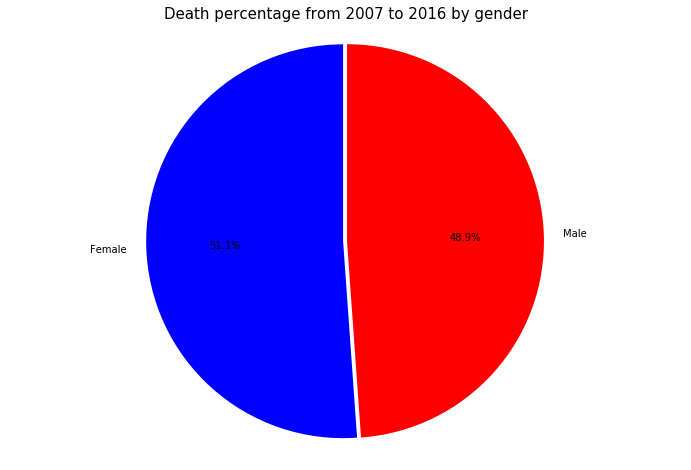

In [30]:
mycolors=["blue","red"]
explode = (0.02, 0.02)
fig1, ax2 = plt.subplots(figsize=(12,8))
ax2.pie(agg4['Death Rate'], radius=2 ,labels=agg4['Sex'],explode=explode,autopct='%1.1f%%',shadow=False, startangle=90,
colors=mycolors)
ax2.axis('equal')

plt.title("Death percentage from 2007 to 2016 by gender",fontsize=15)
plt.rcParams.update({'font.size': 12})
plt.show()

In [31]:
agg1=pd.DataFrame() #Creating new dataframe for ploting graphs for visualisation
agg1['Death Rate']=df2['Deaths'].groupby([df2['Race Ethinicity'],df2['Sex']]).sum()
agg1=agg1.reset_index(level=['Sex','Race Ethinicity']) # Reset index by removing 'Sex' and 'Race Etinicity' from the columns

In [32]:
agg1

,Race Ethinicity,Sex,Death Rate
0,Asian and Pacific Islander,Female,15576
1,Asian and Pacific Islander,Male,19109
2,Black Non-Hispanic,Female,73793
3,Black Non-Hispanic,Male,65740
4,Hispanic,Female,45922
5,Hispanic,Male,49527
6,White Non-Hispanic,Female,132785
7,White Non-Hispanic,Male,122416


In [33]:
agg11=pd.DataFrame() #Creating new dataframe for ploting graphs for visualisation
agg11['Death Rate']=df2['Deaths'].groupby([df2['Race Ethinicity']]).sum()
agg11=agg11.reset_index(level=['Race Ethinicity'])

In [34]:
agg11

,Race Ethinicity,Death Rate
0,Asian and Pacific Islander,34685
1,Black Non-Hispanic,139533
2,Hispanic,95449
3,White Non-Hispanic,255201


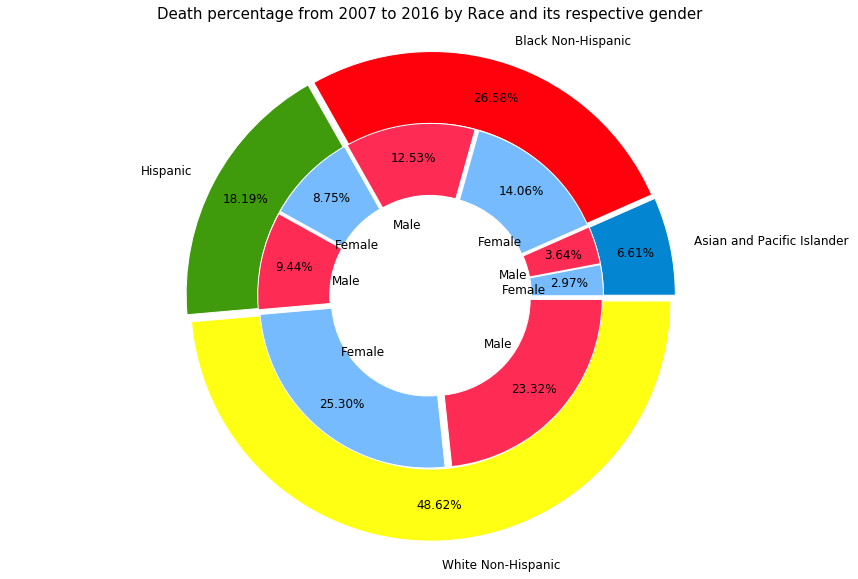

In [35]:
fig, ax = plt.subplots(figsize=(15,10))
explode=(0.02,0.02,0.02,0.02)
explode1=(0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02)

plt.pie(agg11['Death Rate'], radius=1,
        colors=['xkcd:cerulean', 'xkcd:bright red', 'xkcd:grass green','xkcd:yellow'],
        labels=agg11['Race Ethinicity'], autopct='%.2f%%',
        pctdistance=0.85, explode=explode,shadow=False,
        wedgeprops=dict(width=0.3, edgecolor='white'))

plt.pie(agg1['Death Rate'], radius=0.7,explode=explode1,
        colors=['xkcd:sky blue', 'xkcd:reddish pink', 'xkcd:sky blue',
                'xkcd:reddish pink', 'xkcd:sky blue', 'xkcd:reddish pink','xkcd:sky blue', 'xkcd:reddish pink'],
        wedgeprops=dict(width=0.3, edgecolor='white'),
        labels=agg1['Sex'], autopct='%.2f%%',
        pctdistance=0.8, labeldistance=0.4, shadow=False,)
plt.axis('equal')
plt.title("Death percentage from 2007 to 2016 by Race and its respective gender",fontsize=15)
plt.rcParams.update({'font.size': 12})
plt.show()

### _From the above  Donut chart we observe that the people from the race White Non-Hispanic have the highest death rate among which majority of them are Female while in the case of Hispanic and Asian people the death rate is higher for the gender male_

In [36]:
agg6=pd.DataFrame()
agg6['Death Rate']=df2['Deaths'].groupby([df2['Year'],df2['Sex']]).mean()
agg6=agg6.reset_index(level=['Year','Sex'])

In [37]:
agg6.head()

,Year,Sex,Death Rate
0,2007,Female,610.955556
1,2007,Male,575.622222
2,2008,Female,625.113636
3,2008,Male,576.266667
4,2009,Female,592.422222


In [38]:
pd.to_numeric(agg6['Year']).unique()
b = (agg6[agg6['Sex']== 'Female']['Death Rate'].append(agg6[agg6['Sex']== 'Male']['Death Rate'])).reset_index()

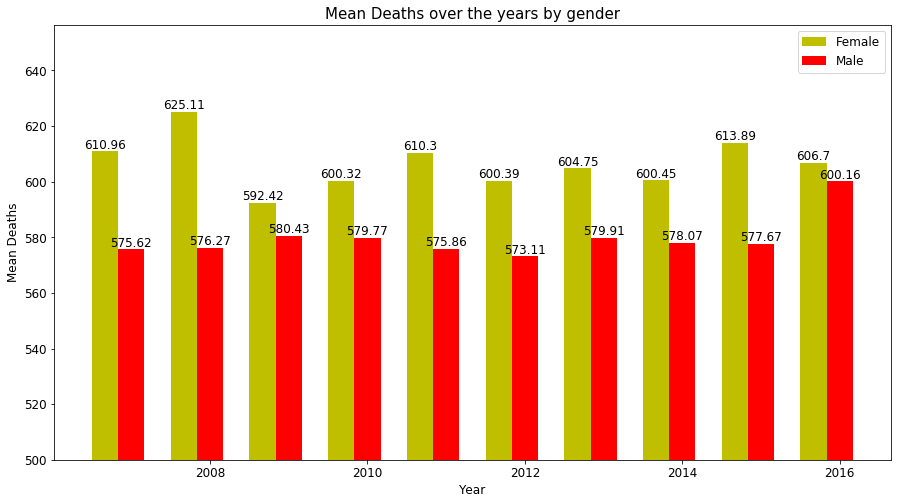

In [39]:
womenMeans = (610.955556,625.113636,592.422222,600.318182,610.295455,600.386364,604.750000,600.454545,613.886364,606.704545)
menMeans = (575.622222, 576.266667, 580.431818, 579.772727, 575.863636,573.113636,579.909091,578.068182,577.666667,600.159091)
indices = list(pd.to_numeric(agg6['Year']).unique())
#Calculate optimal width
width = np.min(np.diff(indices))/3

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax.bar(indices-width,womenMeans,width,color='y',label='-Ymin')
ax.bar(indices,menMeans,width,color='r',label='Ymax')
i=0
rects = ax.patches
for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height,str(round(b['Death Rate'][i],2)), ha='center', va='bottom')
        i=i+1

ax.set_xlabel('Year')
ax.set_ylabel('Mean Deaths')

plt.ylim(ymin=500)
ax.legend(['Female','Male'])
plt.title("Mean Deaths over the years by gender",fontsize=15)
plt.rcParams.update({'font.size': 13})
plt.show()

In [40]:
agg3=pd.DataFrame()
agg3['Death Rate']=df2['Deaths'].groupby([df2['Leading Cause']]).mean()
count=df2['Leading Cause'].value_counts()

Text(0.5,1,'Count of occurance of each disease over the years by type of Disease and Sex')

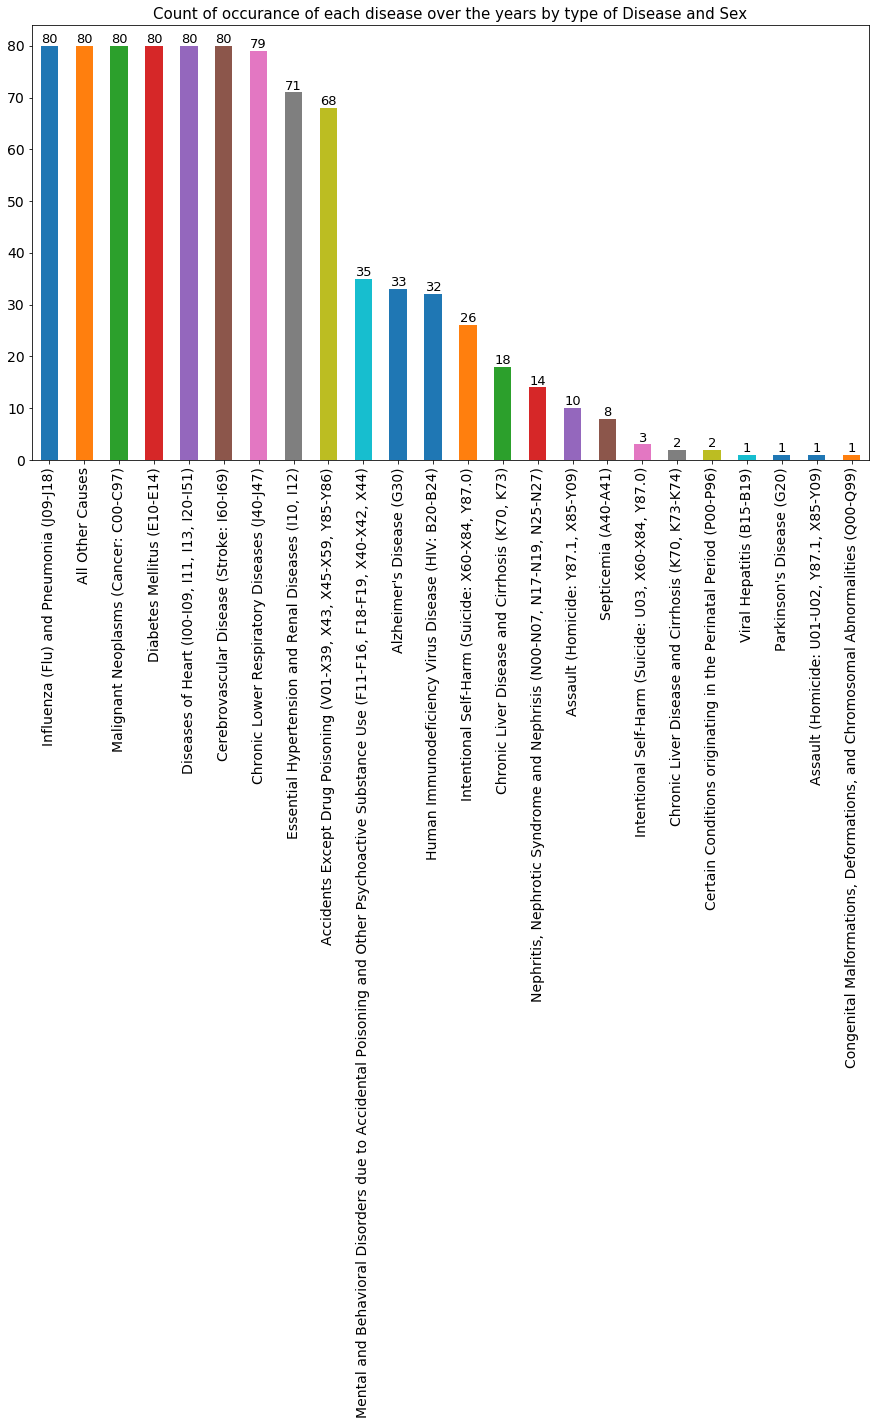

In [41]:
p = count.plot.bar(figsize=(15,8),
fontsize=14)
i=0
rects = p.patches
for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height,str(round(count[i],2)), ha='center', va='bottom')
        i=i+1

plt.title("Count of occurance of each disease over the years by type of Disease and Sex",fontsize=15)

In [42]:
agg3.head()

,Death Rate
Leading Cause,
"Accidents Except Drug Poisoning (V01-X39, X43, X45-X59, Y85-Y86)",132.544118
All Other Causes,1232.700000
Alzheimer's Disease (G30),142.454545
"Assault (Homicide: U01-U02, Y87.1, X85-Y09)",168.000000
"Assault (Homicide: Y87.1, X85-Y09)",227.800000


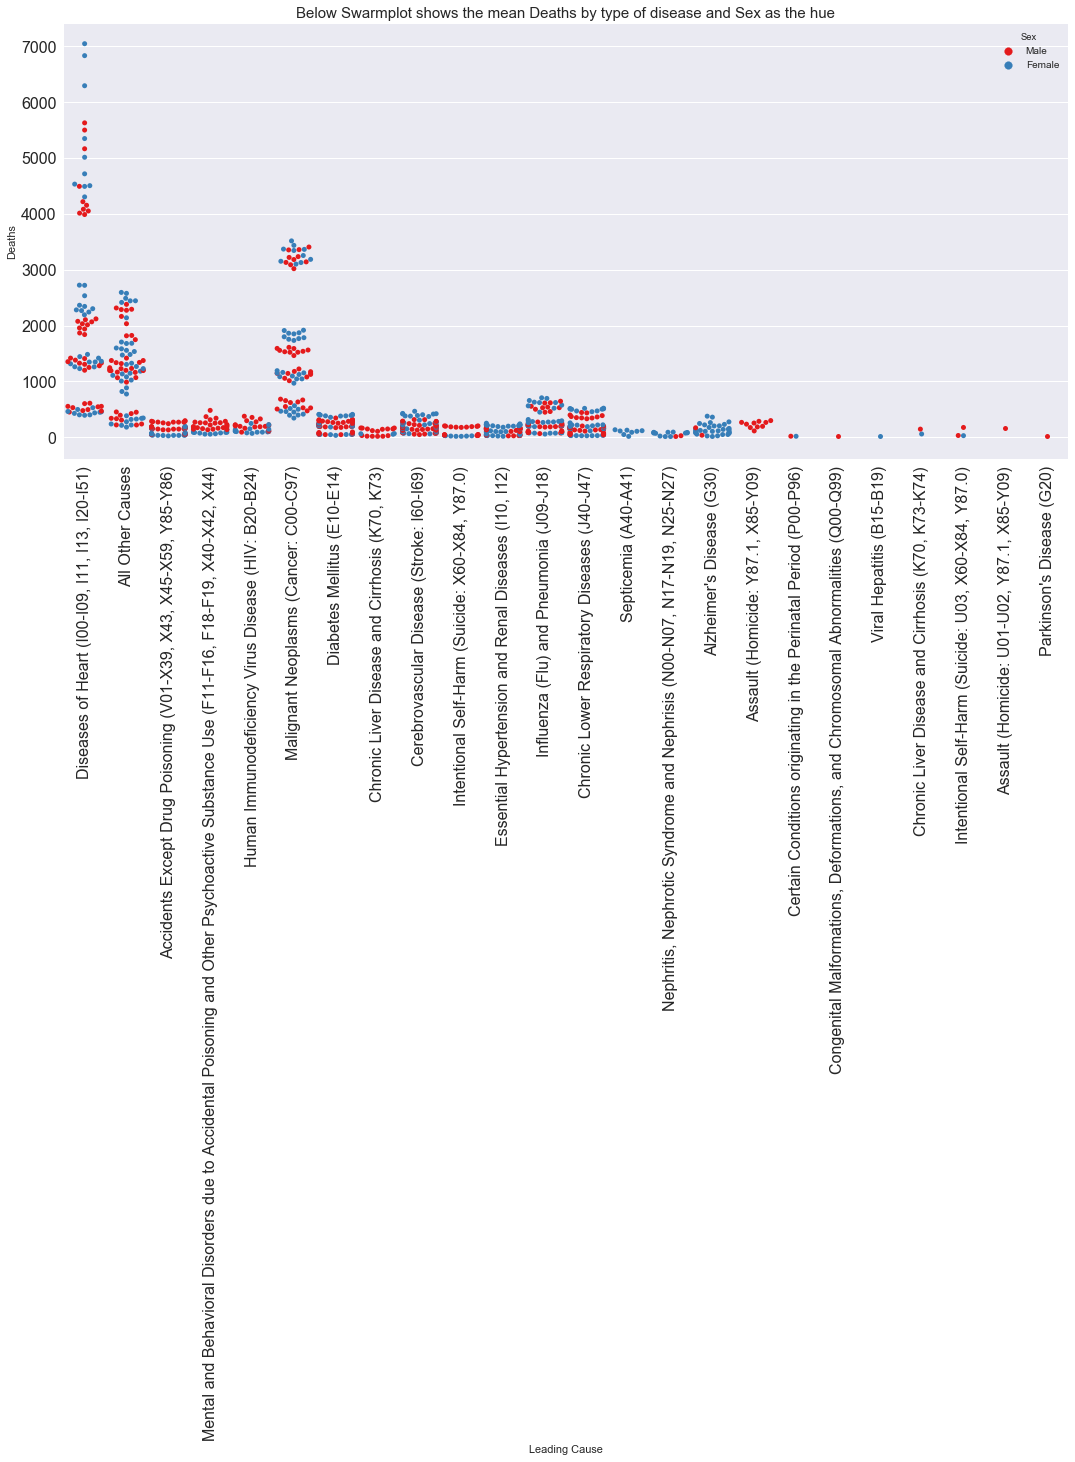

In [54]:
ax = sns.swarmplot(x="Leading Cause", y="Deaths", hue='Sex', data=df2, palette="Set1")
sns.set(rc={'figure.figsize':(18,8)})
plt.xticks(rotation=90)
plt.title("Below Swarmplot shows the mean Deaths by type of disease and Sex as the hue",fontsize=15)
ax.tick_params(labelsize=16)

Text(0,0.5,'Mean Deaths')

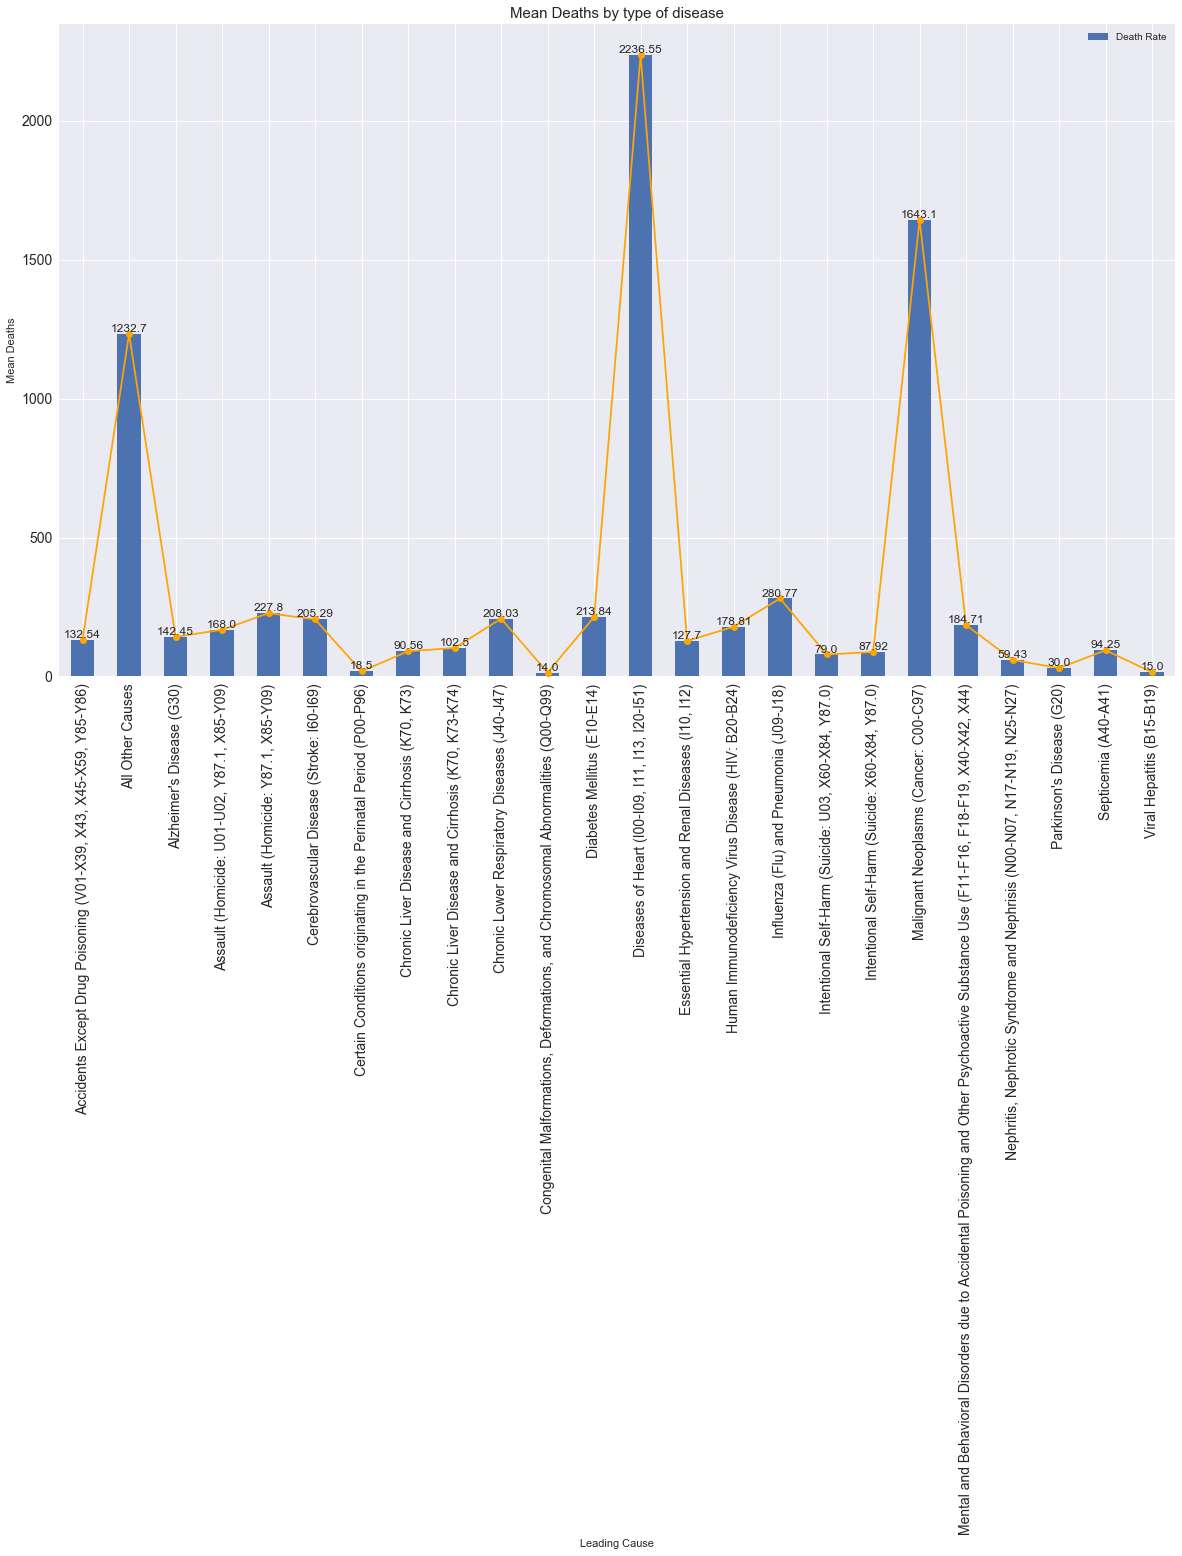

In [44]:
p = agg3.plot.bar(figsize=(20,12),fontsize=14)
i=0

rects = p.patches
for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height,str(round(agg3['Death Rate'][i],2)), ha='center', va='bottom')
        i=i+1
plt.title("Mean Deaths by type of disease",fontsize=15)
plt.plot(agg3['Death Rate'], '-o', color='orange')
p.set_ylabel('Mean Deaths')

### _From the above chart we observe that people most often suffer from the diseases of the heart and cancer which are the two leading cause of death in New York_

In [45]:
agg5=pd.DataFrame()
agg5['Death Rate']= df2['Deaths'].groupby([df2['Leading Cause'],df2['Year']]).mean()

In [46]:
agg5.head()

Death Rate
Leading Cause                                      Year            
Accidents Except Drug Poisoning (V01-X39, X43, ... 2007  126.750000
                                                   2008  128.000000
                                                   2009  129.857143
                                                   2010  121.428571
                                                   2011  148.000000

In [47]:
agg5=agg5.reset_index(level=['Leading Cause','Year'])

### _Below we are creating the trend path of the top 3 diseasses over the years_

In [48]:
c1 = agg5[agg5['Leading Cause'] == 'Diseases of Heart (I00-I09, I11, I13, I20-I51)'].copy()
c1.set_index('Year',inplace=True)
c1.head()

,Leading Cause,Death Rate
Year,,
2007,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",2649.250
2008,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",2614.750
2009,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",2475.125
2010,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",2210.625
2011,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",2090.250


(1500, 2781.7125)

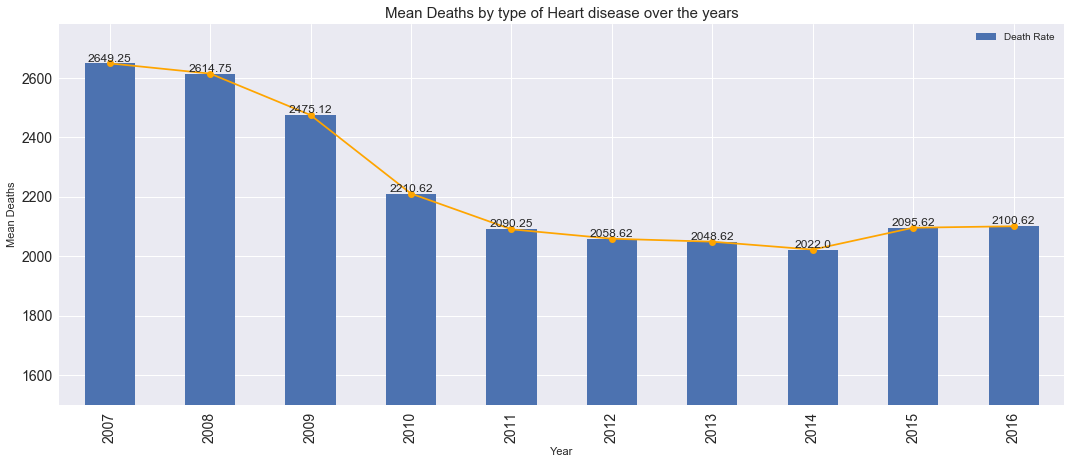

In [49]:
p = c1.plot.bar(figsize=(18,7),fontsize=14)
p.set_ylabel('Mean Deaths')
i=0
rects = p.patches

# Create this below loop to display values on top of bar graphs for precision and identifuing definite values.
for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height,str(round(c1['Death Rate'][i],2)), ha='center', va='bottom')
        i=i+1
plt.title("Mean Deaths by type of Heart disease over the years",fontsize=15)
plt.plot(c1['Death Rate'], '-o', color='orange') # For trend line
plt.ylim(ymin=1500)

### _From the above chart we observe that diseases of heart which is the highest cause of deaths has been seen to have a decreasing trend in the number of deaths caused due to it over the years_

In [50]:
c2 = agg5[agg5['Leading Cause'] == 'Influenza (Flu) and Pneumonia (J09-J18)'].copy()
c2.set_index('Year',inplace=True)

(150, 323.1375)

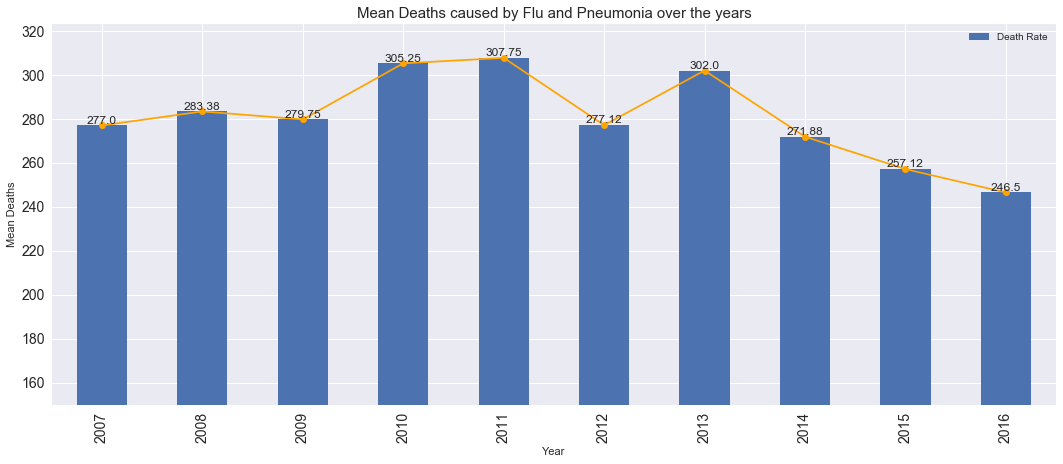

In [51]:
p = c2.plot.bar(figsize=(18,7),fontsize=14)
p.set_ylabel('Mean Deaths')
i=0
rects = p.patches
for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height,str(round(c2['Death Rate'][i],2)), ha='center', va='bottom')
        i=i+1
plt.title("Mean Deaths caused by Flu and Pneumonia over the years",fontsize=15)
plt.plot(c2['Death Rate'], '-o', color='orange')
plt.ylim(ymin=150)

### _From the above chart we observe that Flu and Pneumonia had a peak cause of death during the years 2010 and 2011 but it is gradually decreasing as a cause of death in the following years._

In [52]:
c3 = agg5[agg5['Leading Cause'] == 'Malignant Neoplasms (Cancer: C00-C97)'].copy()
c3.set_index('Year',inplace=True)

(1500, 1749.69375)

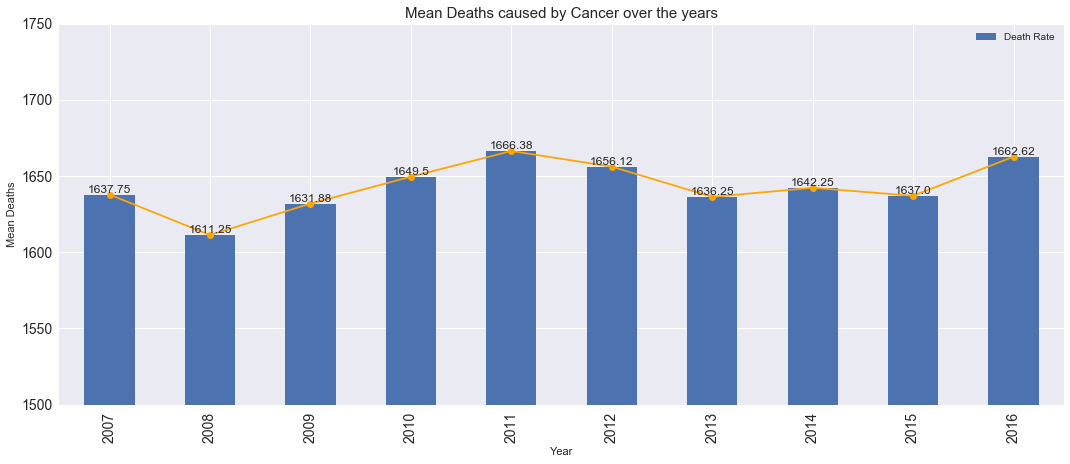

In [53]:
p = c3.plot.bar(figsize=(18,7),fontsize=14)
p.set_ylabel('Mean Deaths')
i=0
rects = p.patches
for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height,str(round(c3['Death Rate'][i],2)), ha='center', va='bottom')
        i=i+1
plt.title("Mean Deaths caused by Cancer over the years",fontsize=15)
plt.plot(c3['Death Rate'], '-o', color='orange')
plt.ylim(ymin=1500)

### _From the above chart we observe that Cancer has been an consistent cause of death over the years as the trend line indicates that it has been going up and down as a cause of death in New York._

### _<font color=green>Analysis and Conclusion</font>_

### From the above visualisations and analysis, we conclude 3 main points:

1. Female deaths are higher than male deaths in New York over the years 2007 to 2016.
2. White Non-Hispanic people followed by Black Non-Hispanic are the race which suffers from most of the diseases and die.
3. Heart diseases followed by malingnant cancers is the cause of majority of the deaths in New York although the rate of deaths due to heart diseases is reducing over the years.